# Etapa 1 del proyecto. La tarea de regresión: modelos polinomiales y regularizados

En este proyecto se nos da un enunciado del problema. En primera medida se analiza y se resaltan las partes mas importantes para el desarrollo del mismos, identidicando el problema real, el objetivo a conseguir(variable objetivo) y los datos que tenemos(variables independientes).

Actualmente, estamos ante la presencia de una variedad de fenómenos que están afectando el medio ambiente y que se reflejan en el calentamiento global, la **contaminación del aire** y la pérdida de biodiversidad, entre otros. Establecer políticas que ataquen sus causas y el desarrollo de planes de **gestión de riesgos que mitiguen sus efectos** y permitan accionar oportunamente es uno de los grandes retos a los que nos enfrentamos como sociedad.

Uno de estos problemas está relacionado con el cambio climático, el cual se refiere tanto al calentamiento global provocado por la **emisión de gases de efecto invernadero,** como al aumento de los desastres ambientales inducidos por dicho calentamiento. En particular, en el caso del **dióxido de carbono (CO2)**, aunque es necesario para la vida, **su exceso** de concentración **contribuye significativamente al efecto invernadero**, que eleva la temperatura del planeta y desequilibra el ciclo natural. Una manera de reducir las emisiones de CO2 es fomentar planes de movilidad sostenible, la cual se refiere a la capacidad de hacer traslados, de personas o mercancías, con seguridad y sin afectar la salud ni los ecosistemas. Apoyar e incentivar medidas de movilidad sostenible, como el **uso de vehículos eléctricos y bicicletas**, contribuiría en gran medida a paliar este problema.

En este contexto, el problema que se va a abordar es:
- **Construir un modelo predictivo** que permita 
- **Determinar la demanda** sobre el 
- **Uso de un sistema de alquiler de bicicletas**. 

Este conocimiento puede dar soporte para mejorar el servicio y conocer los factores que inciden en su eficiencia.

Teniendo encuenta entonces este simple analisis y revisando el archivo .csv podemos determinar que:
- Variable objetivo o dependiente 'y' (Demanda o Cantidad de bicicletas rentadas)
- Variables independientes 'x' (season, weekday, weathersit, temp, atemp, hum, windspeed, time_of_day)

Realizaremos ahora la importación de las librerías necesarias para el desarrollo del proyecto

In [62]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, KFold

#Aunque el proyecto no lo pide explicitamente intentaré aplicar un escalador dado el caso que que se necesite o no, ya depende del análisis que se realice mas adelante
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler, RobustScaler,OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from importlib.metadata import version
import seaborn as sea

print(f"Versión de Scikit-learn: {version('scikit-learn')}")
print(f"Versión de Pandas: {version('pandas')}")

Versión de Scikit-learn: 1.8.0
Versión de Pandas: 2.3.3


# 1. **Exploración y perfilamiento de los datos**

## Carga de datos

Como primera medida vamos a renombrar el archivo csv ya que viene como **"ETYT2_6WS-GwUXGPSWerJQ_c011f04f69254a4087d4396a2e4307f1_Datos_Etapa-1"** y es un poco mas manejable si lo dejamos como **"Datos_Etapa1"**

In [63]:
data_raw = pd.read_csv('./Data/Datos_Etapa1.csv',sep=',')
#datatest = pd.read_csv('./CopiaConVaciosDatos_Etapa-1.csv',sep=',')
#datatest.duplicated().sum()

In [64]:
#Verificamos que se encuentren cargados
data_raw.head()

,season,weekday,weathersit,temp,atemp,hum,windspeed,cnt,time_of_day
0,Winter,6,Clear,3.28,3.0014,0.81,0.0,16,Night
1,Winter,6,Clear,2.34,1.9982,0.80,0.0,40,Night
2,Winter,6,Clear,2.34,1.9982,0.80,0.0,32,Night
3,Winter,6,Clear,3.28,3.0014,0.75,0.0,13,Night
4,Winter,6,Clear,3.28,3.0014,0.75,0.0,1,Night


In [65]:
# Luego de verificar que se hayan cargado entonces  realizamos una copia del mismo para utilizarla durante todo el ciclo de ML
data = data_raw.copy()
data.head()

,season,weekday,weathersit,temp,atemp,hum,windspeed,cnt,time_of_day
0,Winter,6,Clear,3.28,3.0014,0.81,0.0,16,Night
1,Winter,6,Clear,2.34,1.9982,0.80,0.0,40,Night
2,Winter,6,Clear,2.34,1.9982,0.80,0.0,32,Night
3,Winter,6,Clear,3.28,3.0014,0.75,0.0,13,Night
4,Winter,6,Clear,3.28,3.0014,0.75,0.0,1,Night


## Verificación de datos

Acontinuación realizaremos una exploración y verificación de los datos y en cada paso marcaré los resultados de la siguiente manera para tomar decisiones en su limpieza posteriormente:
- Verde: Para indicar que los datos en ese paso con correctos
- Rojo: Para indicar que se requiere de una limpieza de los datos que posteriormente realizaremos
- Amarillo: Para indicar una inconsistencia de los datos, pero no requiere de limpieza



Es este paso realizaremos la verificación de los datos para saber si vienen completos, vacios, NaN y duplicados:

In [66]:
# Con estas funciones podemos sumar la cantidad de True que contiene cada columna si dado el caso tine un dato en None, NaN o NaT o campos vacios
data.isna().sum()

season         0
weekday        0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
cnt            0
time_of_day    0
dtype: int64

<div class="alert alert-block alert-success">
<b>Resultado:</b> Al ejecutar vemos que no hay datos faltantes
</div>

In [67]:
#Ahora revisaremos si existen duplicados
data.duplicated().sum()

np.int64(42)

<div class="alert alert-block alert-danger">
<b>Resultado:</b> Al ejecutar la función vemos que existen <b>42 filas duplicadas</b>
</div>

En el apartado de **Limpieza y preparación de los datos** realizaremos su limpieza.

A continuación lo que deseo es ver si algún dato se encuentra corrupto por ejemplo:
- Season solo debería tener 4 unicos datos **'Winter', 'Spring', 'Summer', 'Fall'** y no debería existir un dato corrupto como **Winterr** o **sumer**
- Tambíen deseo comprobar que los campos númericos solo tengan datos númericos, no deberíamos ver texto o caracteres alfabeticos.

Para el primer punto usaré `data.nunique()` que me sirve para ver los **datos únicos de cada columna.**

Para el segundo uso `data.dtypes` el cual me permite ver que **tipo de dato tiene cada columna.**
- Si es Object entonces contiene caracteres alfabéticos.
- Si el dato es int o float entonces solo contiene  números.




In [68]:
data.nunique()

season           4
weekday          7
weathersit       4
temp            50
atemp           65
hum             89
windspeed       30
cnt            869
time_of_day      3
dtype: int64

Teniendo en cuenta el diccionario deberíamos ver datos de unicos de la siguiente manera:
- **Season: 4**  - Estación del año (Winter, Spring, Summer, Fall)
- **Weathersit: 4**  - Clima (Clear, Mist, Light Rain, Heavy Rain)
- **Time_of_day: 3**  - Parte del día (Morning, Evening, Night)
- **weekday: 7**  -  Día de la semana (de 1 a 7)

<div class="alert alert-block alert-success">
<b>Resultado:</b> Al observar el resultado observamos que todos los datos son correctos
</div>

In [69]:
data.dtypes

season          object
weekday          int64
weathersit      object
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
time_of_day     object
dtype: object

Revisando primeramente el diccionario deberíamos ver solo **Object** en los campos **season, weathersit, time_of_day** y en el resto de campos deberían ser un tipo de dato númerico.
<div class="alert alert-block alert-success">
<b>Resultado:</b> Al ejecutar observamos que todo está correcto como se espera, por lo no hay datos corruptos. 
</div>


Tambien deseo ver **espeficamente cuales son esos datos unicos** y comprobar si efectivamente son los que se muestran en el diccionario

Para esto se puede simplemente usar por ejemplo `data['season'].unique()` para cada columna, pero para hacerlo mejor aprendí que uno mismo puede crear un `dataframe` personalizado con las columnas que uno desee:
- creo un DataFrame y dentro de este encierro en llaves las 3 columnas que deseo ver simultaneamente
    - **num_unicos** : Esto lo hice anteriormente con `data.nunique()`
    - **valores_unicos** : Lo que nos hace falta ver. Aqui coloco un ciclo for para que itere la función `data[col].unique().tolist()` por cada columna del dataframe data
    - **tipo** : Lo vimos anteriormente con `data.dtypes`

In [70]:

resumen = pd.DataFrame({
    'num_unicos': data.nunique(),
    'valores_unicos': [data[col].unique().tolist() for col in data.columns],
    'tipo': data.dtypes
})
resumen

,num_unicos,valores_unicos,tipo
season,4,"[Winter, Spring, Summer, Fall]",object
weekday,7,"[6, 0, 1, 2, 3, 4, 5]",int64
weathersit,4,"[Clear, Mist, Light Rain, Heavy Rain]",object
temp,50,"[3.28, 2.34, 1.4000000000000004, 7.04000000000...",float64
atemp,65,"[3.0014000000000003, 1.9982000000000009, 1.001...",float64
hum,89,"[0.81, 0.8, 0.75, 0.86, 0.76, 0.77, 0.72, 0.82...",float64
windspeed,30,"[0.0, 6.0032, 16.997899999999998, 19.0012, 19....",float64
cnt,869,"[16, 40, 32, 13, 1, 2, 3, 8, 14, 36, 56, 84, 9...",int64
time_of_day,3,"[Night, Morning, Evening]",object


Datos del diccionario:
- **Season: 4**  - Estación del año (Winter, Spring, Summer, Fall)
- **Weathersit: 4**  - Clima (Clear, Mist, Light Rain, Heavy Rain)
- **Time_of_day: 3**  - Parte del día (Morning, Evening, Night)
- **weekday: 7**  -  Día de la semana (de 1 a 7)

<div class="alert alert-block alert-warning">
<b>Resultado:</b> Al observar el resultado observamos que todos los datos son correctos, pero si observamos la columna <b>weekday</b> parece que los días <b>no van del 1 al 7</b> tal como se expresa en el diccionario. Es importante saber como se representan los datos realmente.
</div>

Es necesario saber como se representan los días de la semana. **No se sabe si 0 representa el Lunes o Domingo.** 

Aunque al modelo no le importa saber qué día específico es, para nosotros sí es importante tenerlo claro, para poder mostrar resultados, realizar estatisticas, mostrar graficas y especialmente cuando probamos el modelo con **datos reales.** En la práctica, no trabajaremos con valores numéricos como **0–6 o 1–7**, sino con datos como Monday, Friday o Sunday. Por eso, debemos **convertir correctamente** esas categorías **antes de pasarlas al modelo** y tener total claridad sobre qué valor de la **variable X representa**, por ejemplo, el día domingo.

Para solucionar mi duda me fuí directamente al repositorio donde se obtuvo el dataset [https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing?select=day.csv] y revisando observo que existen otras columnas como por ejemplo `dteday` el cual es la fecha del día del recuento del alquier de biciclatas.

Realizo un muestreo de varios valores de `weekday` = 0 y verifico directamente con el calendario comprobando que entonces el **día 0 equivale al domingo**  tambien se comprueba que el 1 es el lunes y asi sucesivamente.

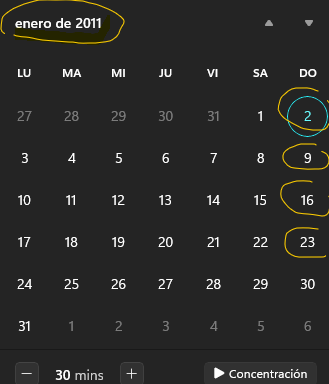

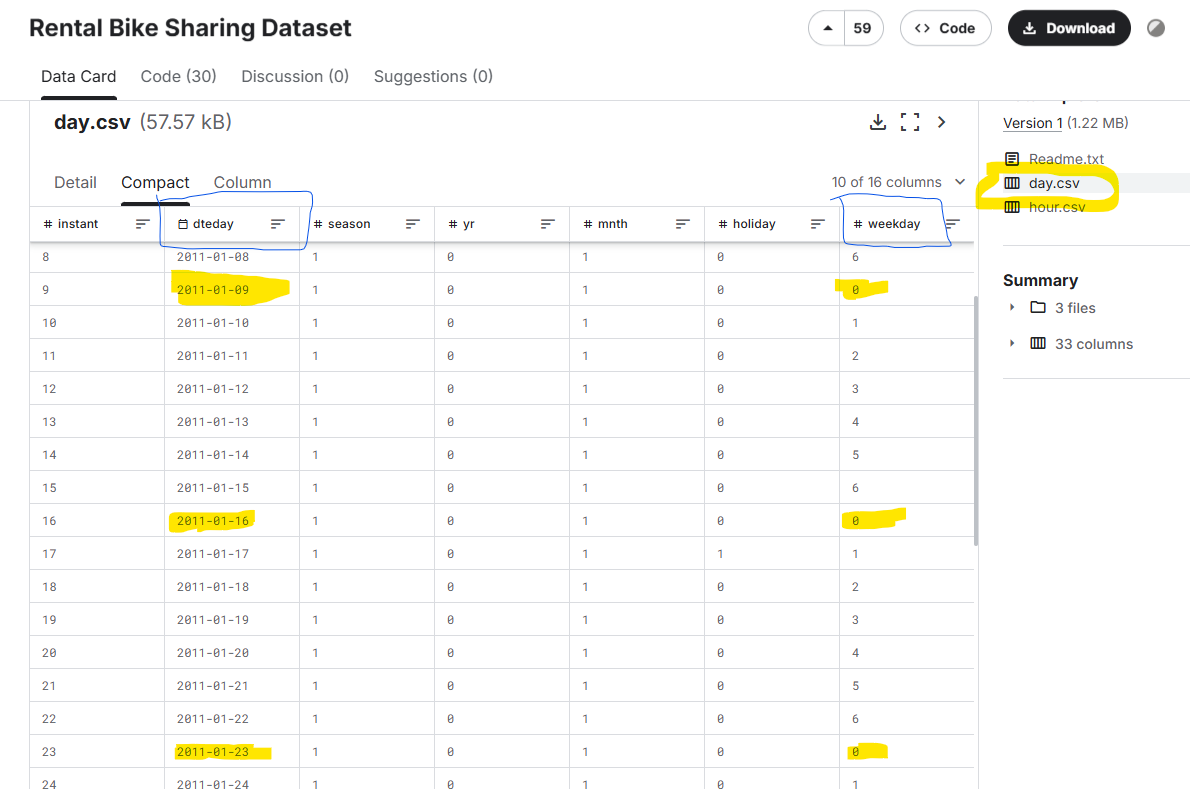

In [71]:
data.describe()

,weekday,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,3.003683,15.358397,15.401157,0.627229,12.736540,189.463088
std,2.005771,9.050138,11.342114,0.192930,8.196795,181.387599
min,0.000000,-7.060000,-16.000000,0.000000,0.000000,1.000000
25%,1.000000,7.980000,5.997800,0.480000,7.001500,40.000000
50%,3.000000,15.500000,15.996800,0.630000,12.998000,142.000000
75%,5.000000,23.020000,24.999200,0.780000,16.997900,281.000000
max,6.000000,39.000000,50.000000,1.000000,56.996900,977.000000


<div class="alert alert-block alert-success">
<b>Resultado:</b> Observamos que no tenemos valores atipícos como por ejemplo número de alquiler negativos o temperaturas irreales como 80°C. 
</div>

Ahora vamos a observar si existen valores atipicos y si los datos podrían tener sesgos, por ejemplo podríamos tener mas días domingos que el resto de los 6 días y eso conlleva a que en el entrenamiento el modelo tenga un alto sesgo para datos reales priorizando más el domingo que otros días:

array([[<Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

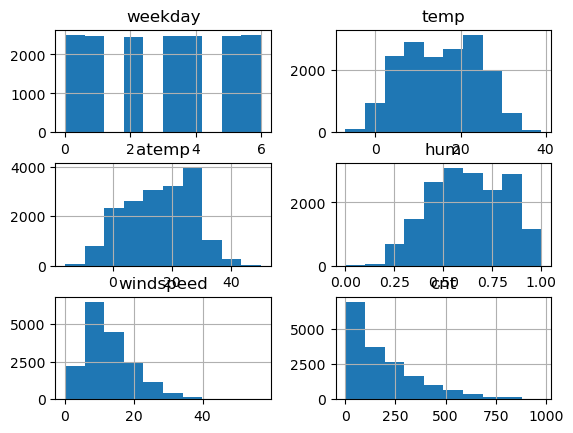

In [72]:
data.hist()
#Con esto solo nos va a mostrar las graficas de las variables numerícas.

<div class="alert alert-block alert-danger">
<b>Resultado:</b> Observamos que todas las <b>variables numéricas</b> tiene una distribución de los <b>datos uniformes</b>, aunque se ve <b> un tanto sesgado windspeed</b> a la derecha, pero donde veo mayor problema es en justamente la <b>variable objetivo cnt</b>, tiene un claro sesgo hacia la derecha, donde tenemos muy poquitos datos de mayor demanda y muchos de poca demanda.

Más adelante tomaré la decisión de utilizar el escalado de caracteristicas <b>RobustScaler</b> ya que nos permite regular un poco mejor cuando hay datos atipicos o outliners y <b>reduce el impacto de estos</b> sobre todo por windspeed.
</div>

Ahora vamos a observar la distribución de las variables categóricas:
- Haciendo uso de la librería `Matplotlib` y contando la frecuencia con que aparecen los datos con `value_counts()` podemos graficas las columnas que necesitamos.
- En el parámetro `kind` indicamos en tpo de grafica que en este caso es de barras

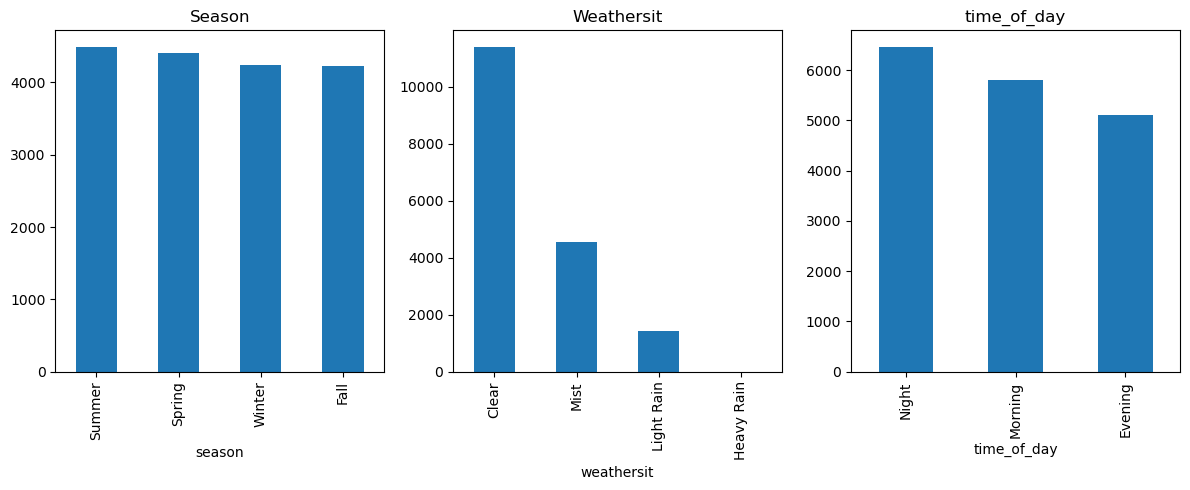

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

data['season'].value_counts().plot(kind='bar', ax=axes[0], title='Season')
data['weathersit'].value_counts().plot(kind='bar', ax=axes[1], title='Weathersit')
data['time_of_day'].value_counts().plot(kind='bar', ax=axes[2], title='time_of_day')

plt.tight_layout()
plt.show()

In [74]:
data['weathersit'].value_counts()

weathersit
Clear         11413
Mist           4544
Light Rain     1419
Heavy Rain        3
Name: count, dtype: int64

<div class="alert alert-block alert-danger"> 
<b>Resultado:</b> Se observa que existe un problema muy grande de sesgo para la <b>variable weathersit</b> ya que solo tenemos <b>3 datos de Heavy Rain</b> en comparación con los miles de datos que otras categorias. La distribución <b>no es para nada uniforme</b> y puede afectar nuestro entrenamiento además de que<b>el modelo nunca va a sacar provecho de esos 3 datos.</b>
</div>

Tomaremos una decisión en el apartado de **Limpieza y preparación de los datos**

En el último paso verificaré la **correlación** entre las variables numéricas, para esto primero se tiene que separar las variables númericas de las catagóricas:

In [75]:
#En este punto del desarrollo del proyecto ya me di cuenta que weekday tiene que ser categorica ya que el miercoles no tiene que pesar mas que el martes por ejemplo.
numericas = data.drop({'weekday','season','weathersit','time_of_day'},axis='columns')
numericas

,temp,atemp,hum,windspeed,cnt
0,3.28,3.0014,0.81,0.0000,16
1,2.34,1.9982,0.80,0.0000,40
2,2.34,1.9982,0.80,0.0000,32
3,3.28,3.0014,0.75,0.0000,13
4,3.28,3.0014,0.75,0.0000,1
...,...,...,...,...,...
17374,4.22,1.0016,0.60,11.0014,119
17375,4.22,1.0016,0.60,11.0014,89
17376,4.22,1.0016,0.60,11.0014,90
17377,4.22,1.9982,0.56,8.9981,61


<Axes: >

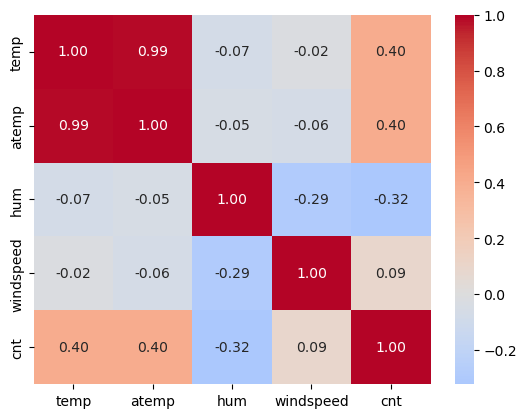

In [76]:
sea.heatmap(numericas.corr(), annot=True, cmap="coolwarm", center=0, fmt='.2f')


<div class="alert alert-block alert-danger"> 
<b>Resultado:</b> Se puede observar con el mapa de calor que existe una correlación buena entre <b>temp, atemp y la variable objetivo cnt</b>, pero una muy alta <b>correlación entre ellas (temp y atemp) de 0.99, casi una correlación lineal exacta</b> y esto se llama <b>multicolinealidad</b> y se debe tomar la decisión de eliminar una de las 2 variables ya que es redundante y pues están aportando lo mismo.

Tambíen se observa que la variable windspeed está muy cerca de 0, esto significa que su influencia en la predicción es muy baja.

No la eliminaré aunque sea muy poco lo que aporta, voy a dejar que la regularización decida si sirve o no sirve en el punto 4 del proyecto a ver que pasa.
</div>

Tomaré una decisión en el apartado de **Limpieza y preparación de los datos**

# **2. Limpieza y preparación de los datos**

En esta sección realizo toda la limpieza necesaria para tener una muy buena calidad de los datos, teniendo en cuenta los resultados del ánalisis en el apartado de exploración y perfilameinto de datos.

Los puntos ajustar se declara a continuación:
- 42 filas duplicadas. Se realizará la eliminación de estos registros para que modelo no se sobreajuste (alta varianza)
- La variable weathersit genera un problema de sesgo al tener solo 3 datos de Heavy Rain. El modelo nunca va a sacar provecho de esos 3 datos y además genera ruido en los demás. Tomé en cuenta dos posibilidades
    1. Eliminar las 3 filas que corresponden al dato Heavy Rain
    2. Cambiar esos 3 datos de **"Heavy Rain"** a **"Light Rain"**
    
    En este caso **es una mejor idea** la **opción 2** ya que lluvia fuerte es casi lo mismo que lluvia suave, al fin y al cabo es lluvia y en un contexto real la lluvia suave suele convetirse en mas fuerte y lo importante para el ejercicio es determinar si el tiempo es nublado, seco, o lluvioso. Además de que agregamos 3 datos más al segúndo dato más escaso el cual es **"Light Rain"**. Tambíen podríamos renombrar el dato directamente como **Rain** ya que solo tendríamos un solo tipo de lluvia, pero para el ejercicio no hace falta, lo dejaré asi.
- Tenemos una correlación practicamente igual de 0.99 entre **temp y atemp** y esto nos resultad en una **multicolinealidad**. En este punto tomaré la decisión de **eliminar atemp** ya que la variable **temp** es más fácil de interpretar y cómodamente de representar más que atemp, la cual es una combización de humedad, velocidad del viento y temperatura y curiosamente tenemos esos 3 factores como variables separadas en nuestro dataset.

- La variable **windspeed** no la eliminaré, dejaré que lasso determine si es representativa para el modelo o no y lo observaré al consultar los coeficientes, si el coeficiente de esta variable es = 0 entonces se podría eliminar.


## Limpieza de datos

In [77]:
data = data.drop_duplicates()
print(f'Datos duplicados: {data.duplicated().sum()}')
print(data.shape)

Datos duplicados: 0
(17337, 9)


In [78]:
print(data['weathersit'].value_counts())

# Unir Heavy Rain con Light Rain ya que ambas son lluvia
data['weathersit'] = data['weathersit'].replace('Heavy Rain', 'Light Rain')

print(data['weathersit'].value_counts())

weathersit
Clear         11389
Mist           4535
Light Rain     1410
Heavy Rain        3
Name: count, dtype: int64
weathersit
Clear         11389
Mist           4535
Light Rain     1413
Name: count, dtype: int64


In [79]:
#Eliminación de la columna atemp
data = data.drop(['atemp'],axis='columns')

In [80]:
data.head()

,season,weekday,weathersit,temp,hum,windspeed,cnt,time_of_day
0,Winter,6,Clear,3.28,0.81,0.0,16,Night
1,Winter,6,Clear,2.34,0.80,0.0,40,Night
2,Winter,6,Clear,2.34,0.80,0.0,32,Night
3,Winter,6,Clear,3.28,0.75,0.0,13,Night
4,Winter,6,Clear,3.28,0.75,0.0,1,Night


## Preparación de los datos

Relizo primero que todo una separación de nuestras variables independientes 'X' y variable dependiente 'y'.
También guardo los strings de los nombres de las columnas numericas y categorias para mas adelantes poder hacer el proceso de escalamiento solo a las variables numéricas y aplicar el proceso de One-hotS Encoder solo a las variables categóricas.

In [81]:


columns_cat = ['weekday','season','weathersit','time_of_day']
columns_num = ['temp','hum','windspeed']


variables_X = data[columns_num + columns_cat]
y = data['cnt']

print(f'X:\n {variables_X.head()}')
print(y)

X:
    temp   hum  windspeed  weekday  season weathersit time_of_day
0  3.28  0.81        0.0        6  Winter      Clear       Night
1  2.34  0.80        0.0        6  Winter      Clear       Night
2  2.34  0.80        0.0        6  Winter      Clear       Night
3  3.28  0.75        0.0        6  Winter      Clear       Night
4  3.28  0.75        0.0        6  Winter      Clear       Night
0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17337, dtype: int64


Realizó aqui de una vez la división de los conjuntos train y test antes de hacer cualquier transformación ya que el test no debe verse afectado.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(variables_X,y, test_size=0.2, random_state=77)

In [83]:
X_train,y_train

(        temp   hum  windspeed  weekday  season  weathersit time_of_day
 7697    9.86  0.94    15.0013        2    Fall  Light Rain     Morning
 5830   23.96  0.74    11.0014        1  Summer  Light Rain     Morning
 4589   20.20  0.73    12.9980        5  Summer       Clear       Night
 6726   17.38  0.94     7.0015        3    Fall  Light Rain       Night
 6150   17.38  0.68     6.0032        0  Summer        Mist       Night
 ...      ...   ...        ...      ...     ...         ...         ...
 4846   25.84  0.74     8.9981        1  Summer       Clear       Night
 7849   19.26  0.56    12.9980        1    Fall       Clear     Evening
 9533    6.10  0.70     0.0000        2  Winter        Mist       Night
 8823    8.92  0.46    15.0013        0  Winter       Clear     Morning
 15097  17.38  0.73    12.9980        3    Fall       Clear     Morning
 
 [13869 rows x 7 columns],
 7697     190
 5830     152
 4589       7
 6726      90
 6150     180
         ... 
 4846     302
 7849    

## One-HotEndocer solo en Catagóricas
Ahora realizaremos una codificación one hot a las variables categóricas, para eso primero debemos separar las numericas de las categoricas. Tambíen eso nos ayudará mas adelante a aplicar RobustScaler solo a las variables numéricas

In [84]:
#aqui uso drop=first para evitar que se genere multicolinealidad, esto elimina la primera categoria de cada clase, para que 
#cuando se de el caso de que por ejemplo, Spring, Summer, Winter son = 0 entonces se sabe que es Fall
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(X_train[columns_cat])
categoricas_train = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(),index=X_train[columns_cat].index)

encoded_test = encoder.transform(X_test[columns_cat])
categoricas_test = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(),index=X_test[columns_cat].index)

categoricas_test



,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_Spring,season_Summer,season_Winter,weathersit_Light Rain,weathersit_Mist,time_of_day_Morning,time_of_day_Night
15379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1094,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
14333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
14602,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11072,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10138,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5168,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5025,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Escalamiento de datos

Hora lo que vamos a realizar es un escalamiento solo a las variables númericas porque lo realicé ya uniendo las numéricas + catagoricas(one-hot) en un solo data frame y al escalar con RubustScaler tambíen me escaló las categóricas y con eso hace que pierdan significado y se pierda el proceso del one-hot

Lo importante es meter todo en un Pipeline para que el escalamiento se aplique correctamente dentro del cross-validation y no haya data leakage:
- Para esto voy a hacer uso de `pipelines` y de `ColumnTransformer`

In [85]:
scaler = RobustScaler()

numericas_scaled = scaler.fit_transform(X_train[columns_num])
numericas_scaled = pd.DataFrame(numericas_scaled, columns=scaler.get_feature_names_out(),index=X_train[columns_num].index)


numericas_test_scaled = scaler.transform(X_test[columns_num])
numericas_test_scaled = pd.DataFrame(numericas_test_scaled, columns=scaler.get_feature_names_out(),index=X_test[columns_num].index)

numericas_test_scaled

,temp,hum,windspeed
15379,-0.3750,0.433333,0.600536
1094,-0.2500,0.466667,0.000000
14333,0.6250,0.066667,0.700402
14602,0.8750,0.233333,0.000000
11072,-0.3125,-0.766667,1.100536
...,...,...,...
16090,-0.6250,-0.600000,0.600536
10138,-0.2500,0.133333,0.400134
5168,0.6250,0.066667,0.600536
5025,0.6875,-0.066667,0.600536


## Verificación de transformaciones - Data Leakage

Ahora quiero visualizar, mediante gráficas, si las transformaciones del escalamiento y del one-hot se hizo correctamente entre el conjunto de entrenamiento y el conjunto test y observar que no haya data leakage y que tampoco se haya escalado las variables categóricas

### Grafica de variables categóricas Train vs Test

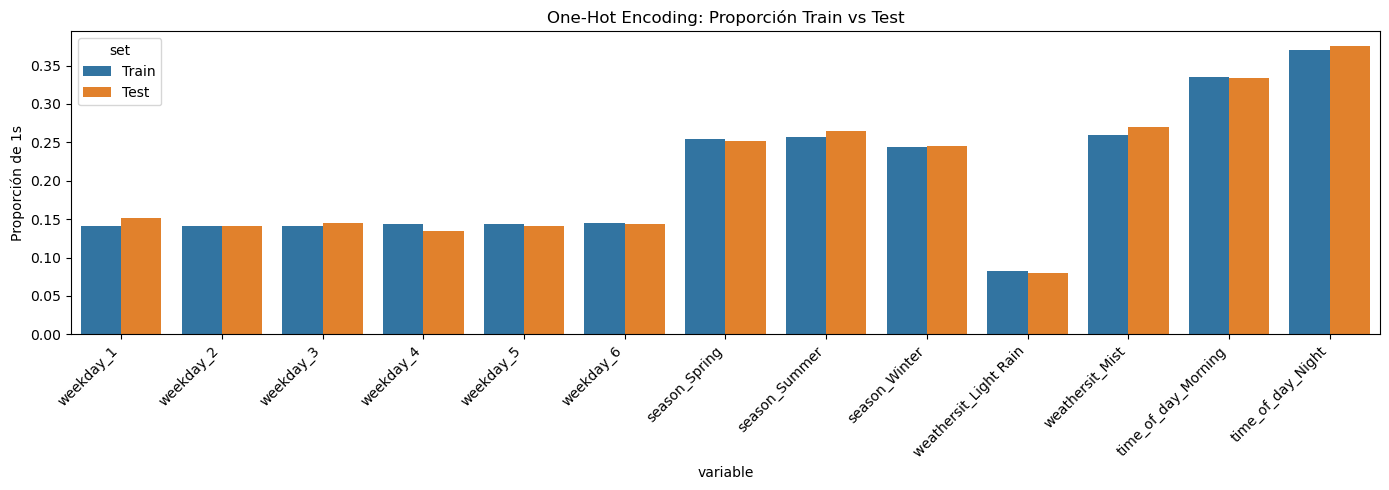

In [86]:
# Calcular proporción de 1s en cada columna one-hot
train_props = categoricas_train.mean().reset_index()
train_props.columns = ['variable', 'proporcion']
train_props['set'] = 'Train'

test_props = categoricas_test.mean().reset_index()
test_props.columns = ['variable', 'proporcion']
test_props['set'] = 'Test'

props = pd.concat([train_props, test_props])

plt.figure(figsize=(14, 5))
sea.barplot(data=props, x='variable', y='proporcion', hue='set')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proporción de 1s')
plt.title('One-Hot Encoding: Proporción Train vs Test')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Resultado:</b> Se puede observar que la transformación se hizo de manera correcta. Si las barras (azul y naranja) estuvieran a la misma altura exacta entonces significa que el modelo ya vió los datos de test y eso estaría mal. <b>En este caso se ve que las graficas tienen altura similar, pero no iguales lo cual nos indica una correcta transformación de los datos sin data leakage.</b>
</div>

### Gráfica de variables numéricas Train vs Test

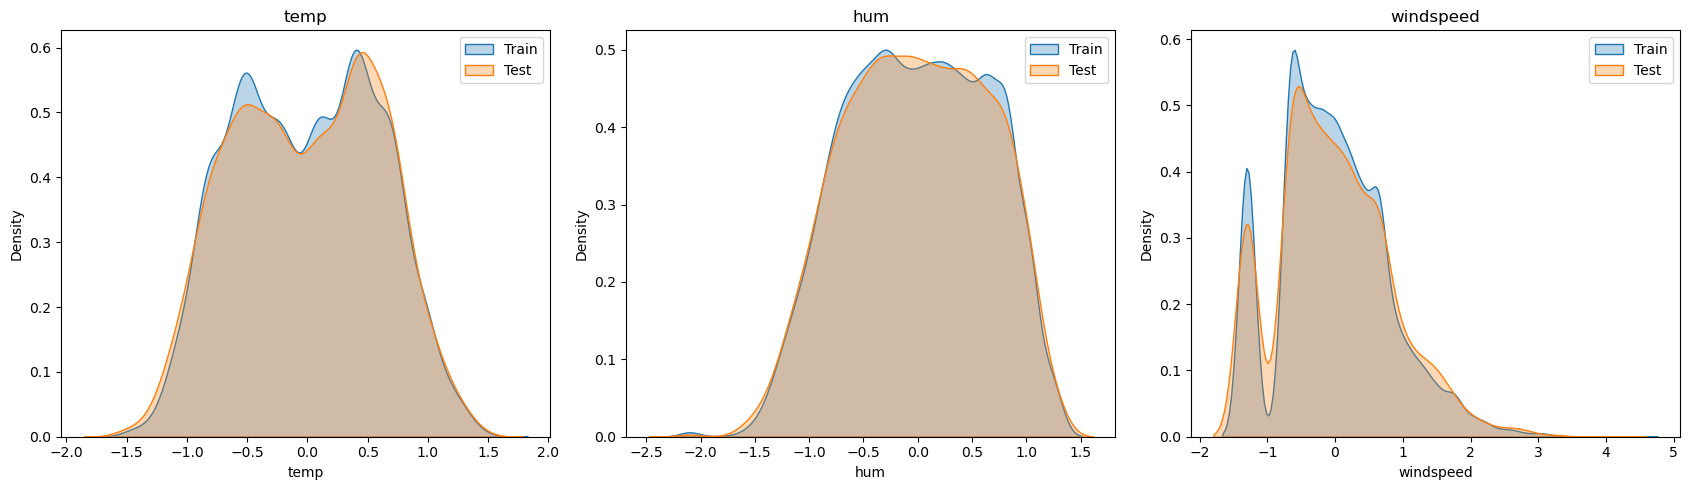

In [87]:
cols = ['temp', 'hum', 'windspeed']
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

for i, col in enumerate(cols):
    sea.kdeplot(data=numericas_scaled, x=col, ax=axes[i], label='Train', fill=True, alpha=0.3)
    sea.kdeplot(data=numericas_test_scaled, x=col, ax=axes[i], label='Test', fill=True, alpha=0.3)
    axes[i].set_title(col)
    axes[i].legend()

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Resultado:</b> Se puede observar que la transformación se hizo de manera correcta. Si las dos graficas (azul y naranja) estuvieran pefectamente superpuestas entonces significa que el modelo ya vió los datos de test y eso estaría mal. <b>En este caso se ve que las graficas tienen un escalamiento similar, pero no iguales lo cual nos indica una correcta transformación de los datos sin data leakage.</b>
</div>

En el siguiente punto vamos a preparar nuestro conjunto final de datos, uniendo las variables numéricas(escaladas) + variables categóricas(One-Hot).

In [88]:
X_train_final = pd.concat([numericas_scaled, categoricas_train], axis=1)
X_test_final = pd.concat([numericas_test_scaled, categoricas_test], axis=1)

X_train_final


,temp,hum,windspeed,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_Spring,season_Summer,season_Winter,weathersit_Light Rain,weathersit_Mist,time_of_day_Morning,time_of_day_Night
7697,-0.3750,1.033333,0.200402,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5830,0.5625,0.366667,-0.199732,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4589,0.3125,0.333333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6726,0.1250,1.033333,-0.599866,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6150,0.1250,0.166667,-0.699732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,0.6875,0.366667,-0.400134,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7849,0.2500,-0.233333,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9533,-0.6250,0.233333,-1.300268,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8823,-0.4375,-0.566667,0.200402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [89]:
X_test_final

,temp,hum,windspeed,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_Spring,season_Summer,season_Winter,weathersit_Light Rain,weathersit_Mist,time_of_day_Morning,time_of_day_Night
15379,-0.3750,0.433333,0.600536,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1094,-0.2500,0.466667,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
14333,0.6250,0.066667,0.700402,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
14602,0.8750,0.233333,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11072,-0.3125,-0.766667,1.100536,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,-0.6250,-0.600000,0.600536,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10138,-0.2500,0.133333,0.400134,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5168,0.6250,0.066667,0.600536,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5025,0.6875,-0.066667,0.600536,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Por último vemos la distribución de nuestra variable objetivo, verificando que la divisíón fue aleatoria.   

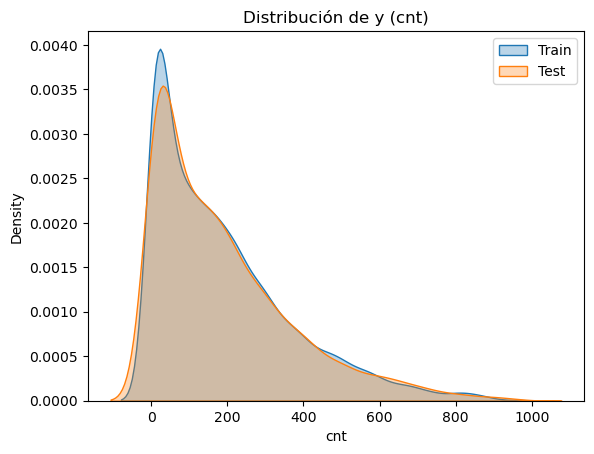

In [101]:
sea.kdeplot(y_train, label='Train', fill=True, alpha=0.3)
sea.kdeplot(y_test, label='Test', fill=True, alpha=0.3)
plt.title('Distribución de y (cnt)')
plt.legend()
plt.show()

Y los indices de ambos conjustos se mantuvieron:

In [ ]:
print(X_train_final.index.equals(y_train.index)) 
print(X_test_final.index.equals(y_test.index))   

True
True


# 3. **Construcción de un modelo de regresión polinomial**

In [94]:
# num_cols = ['temp', 'hum', 'windspeed']
# cat_cols = categoricas.columns.tolist()

# preprocessor = ColumnTransformer([
#     ('num', RobustScaler(), num_cols),
#     ('cat', 'passthrough', cat_cols)
# ])

# #Voy a usar pipeline porque es mucho mas fácil controlar despues las transformaciones del conjunto test ya que si lo hago por separada
# #es mas complicado y se necesita que el escalado y polinomial solo se aplique al test con la fución transform.
# # Tambíen me aseguro de que solo se aplique PolynomialFeatures y el robust escaler unicamente a las variables númericas
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('poly', PolynomialFeatures(degree=2, include_bias=False)),
#     ('lasso', Lasso(alpha=1.0, max_iter=10000))
# ])

In [95]:
#X = pd.concat([numericas, categoricas], axis='columns')

#X = pd.concat([numericas.drop(columns=['cnt']), categoricas], axis=1)
#y = numericas['cnt']

In [96]:
#cat_cols

In [97]:
#scaler = RobustScaler()

#X_scal = scaler.fit_transform(X)



In [98]:
#train, test = train_test_split(data, test_size=0.2, random_state=77)

In [99]:
#x_train = train.drop(['cnt'],axis='columns')
#y_train = train['cnt']

In [100]:
#x_train.head()